torch.Size([1, 20, 100])
torch.Size([1, 20, 100])
tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  7.3912e-01,  ...,  1.0000e+00,
          1.2023e-04,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  9.9570e-01,  ...,  1.0000e+00,
          2.4045e-04,  1.0000e+00],
        ...,
        [-9.6140e-01, -2.7516e-01,  1.0000e+00,  ...,  1.0000e+00,
          2.0438e-03,  1.0000e+00],
        [-7.5099e-01,  6.6032e-01,  6.7149e-01,  ...,  1.0000e+00,
          2.1641e-03,  1.0000e+00],
        [ 1.4988e-01,  9.8870e-01, -9.5402e-02,  ...,  1.0000e+00,
          2.2843e-03,  1.0000e+00]], device='mps:0')


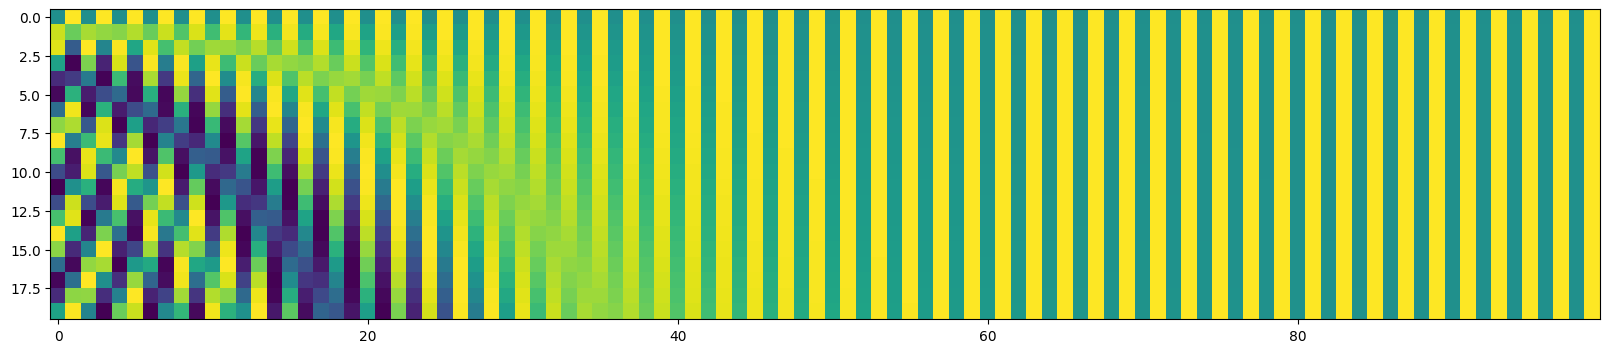

In [ ]:
"""
Ensuring positional encoding works as desired
"""

import sys
import torch
import matplotlib.pyplot as plt

sys.path.append("/Users/benjawesome/coding/positional-gpt-2")

from models.positional_encodings import SinusoidalPositionalEncoding

device = torch.device('mps')


x = torch.zeros(20, 100).unsqueeze(0).to(device)

print(x.shape)

pe = SinusoidalPositionalEncoding(100, device, 20)

print(pe.pe.shape)

x = pe(x)

x = x.squeeze(0)

print(x)

fig, ax = plt.subplots(figsize=(20, 100))

im = ax.imshow(x.detach().cpu().numpy(), cmap='viridis')

In [1]:
"""
Testing each transoformer component
"""

import sys
import torch

sys.path.append("/Users/benjawesome/coding/positional-gpt-2")

# get necessary imports
from models.transformer_components import MultiHeadedAttention
from models.transformer_components import FeedForward
from models.transformer_components import Decoder

# define parameters
DEVICE = torch.device('cpu')
DROPOUT = 0.1
NUM_HEADS = 2
D_MODEL = 10
D_FF = 40

# create an input

input = torch.rand(5, 10).unsqueeze(0)

# test self attention
self_attention = MultiHeadedAttention(D_MODEL, NUM_HEADS, DROPOUT, DEVICE)
attn_scores = self_attention(input)
print("attention scores: " + str(attn_scores))
print("shape: " + str(attn_scores.shape))

# test feed forward
feed_forward = FeedForward(D_MODEL, D_FF, activation=torch.nn.GELU(), dropout=DROPOUT)
print(feed_forward(attn_scores))

# test decoder
decoder = Decoder(D_MODEL, NUM_HEADS, D_FF, torch.nn.GELU(), DROPOUT, DEVICE)
print(decoder.forward(input))

attention scores: tensor([[[ 0.1515, -0.1353, -0.4547, -0.2386, -0.2257, -0.2776, -0.0282,
          -0.2153,  0.4070, -0.1277],
         [ 0.1751, -0.1771, -0.4220, -0.1167, -0.2526, -0.2354,  0.0637,
          -0.3159,  0.4511, -0.1663],
         [ 0.1722, -0.0656, -0.4864, -0.1850, -0.2147, -0.2486,  0.0302,
          -0.2712,  0.3945, -0.1532],
         [ 0.1287, -0.0432, -0.4754, -0.2340, -0.2356, -0.2830,  0.0241,
          -0.1935,  0.3647, -0.1377],
         [ 0.1348, -0.0937, -0.4567, -0.1996, -0.2419, -0.2789,  0.0408,
          -0.1973,  0.3621, -0.1667]]], grad_fn=<ViewBackward0>)
shape: torch.Size([1, 5, 10])
tensor([[[-0.0199, -0.1567,  0.0371, -0.2166,  0.1391, -0.1557,  0.1706,
           0.0264, -0.0348, -0.3009],
         [-0.0035, -0.1569,  0.0430, -0.1977,  0.1390, -0.1749,  0.1618,
           0.0427, -0.0359, -0.3009],
         [-0.0339, -0.1623,  0.0294, -0.1928,  0.1225, -0.1396,  0.1491,
           0.0284, -0.0513, -0.2901],
         [-0.0167, -0.1540,  0.0326, 

In [4]:
"""
Test the data loader
"""

import sys
import torch

sys.path.append("/Users/benjawesome/coding/positional-gpt-2")

from data.dataloader import GPTLoader

# create instance of the data loader

train_dataset = GPTLoader('../files/encoded_train.pt', 5)

train_dataloader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=10,
        shuffle=True
    )

count = 0

for input, target in train_dataloader:
    print(input)
    print("------------------------------------")
    print(target)
    print("------------------------------------")

    count += 1

    if (count == 3):
        break


# print results

tensor([[3331, 2922, 1085,  344, 2034],
        [ 342, 1633,  574,  363,  811],
        [1109,   68,  383,  390, 1334],
        [1513, 1847, 3439, 3632, 1032],
        [2794,  979, 1752, 3159,  707],
        [ 725, 4370,  771, 1184,  301],
        [1647,  274, 4466,  261,  364],
        [ 581,  725,  571,  392,   50],
        [ 527, 4228,   84,   87,  256],
        [ 735,  477,  327,   70, 2488]])
------------------------------------
tensor([[2922, 1085,  344, 2034,  467],
        [1633,  574,  363,  811, 3929],
        [  68,  383,  390, 1334,  279],
        [1847, 3439, 3632, 1032,  278],
        [ 979, 1752, 3159,  707, 2309],
        [4370,  771, 1184,  301, 4383],
        [ 274, 4466,  261,  364,  691],
        [ 725,  571,  392,   50,  651],
        [4228,   84,   87,  256,   36],
        [ 477,  327,   70, 2488,  348]])
------------------------------------
tensor([[ 609,  345, 4053,   46,   76],
        [ 302,  342,   86, 1554, 1239],
        [  50, 4253,  256,  787, 1785],
    

In [5]:
"""
Test a single forward pass of the model
"""

# create model and inputs

import sys
import torch

sys.path.append("/Users/benjawesome/coding/positional-gpt-2")

from models.gpt_implementation import GPT2Model

model = GPT2Model(100, 6, 10, 2, 40, torch.nn.GELU(), 0.1, device=torch.device('cpu'), max_len=20)

input = torch.randint(0, 99, (5, 20))

# test forward pass of model

output = model(input)

print(output)

(tensor([[[-1.2829,  0.2229, -0.5645,  ...,  0.3512,  0.1516, -0.5123],
         [-0.6924, -0.2691, -0.9720,  ..., -0.1538,  0.0711, -0.3457],
         [-0.1936, -0.6236, -0.7920,  ..., -0.1263, -0.1073,  0.0656],
         ...,
         [ 0.0432, -0.3260, -0.4623,  ..., -0.4029, -0.1351,  0.5390],
         [-0.2984,  0.1930, -0.4258,  ..., -0.0190, -0.0534,  0.0834],
         [ 0.1279, -0.6534, -0.3536,  ..., -0.2258,  0.4150,  0.5087]],

        [[-1.1965,  0.2833, -0.7822,  ..., -0.1475, -0.0285, -0.5563],
         [-1.0924,  0.0574, -0.9899,  ...,  0.0914,  0.4501, -0.5598],
         [-0.6525, -0.2414, -0.9388,  ...,  0.2136,  0.4505,  0.0993],
         ...,
         [ 0.0984,  0.1215, -0.4984,  ...,  0.1067, -0.5100,  0.1307],
         [ 0.3701, -0.7840, -0.3008,  ..., -0.3046, -0.0644,  0.6167],
         [ 0.3865, -0.3432, -0.2638,  ..., -0.6499, -0.1481,  0.3050]],

        [[-0.6770, -0.1507, -0.7287,  ..., -0.0365, -0.3542,  0.2937],
         [-0.4845, -0.3082, -0.7801,  ..., -